# Multiple Linear Regression

There are sales figures based on TV, Radio and Newspaper advertisements. From here Sales Column is the target i.e. y=df['Sales']. You will look for an answer to the question of how much my sales figures will increase if I invest separately in TV, radio and newspaper, and you will find out which advertising method is more successful. You will visualize the data you have allocated as testing and the data you predicted in the same graph with a line chart.

Importing Required Packages

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

Importing Dataset

In [37]:
df = pd.read_csv('advertising.csv')

Exploratory Data Analysis (EDA)

In [38]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [41]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [42]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


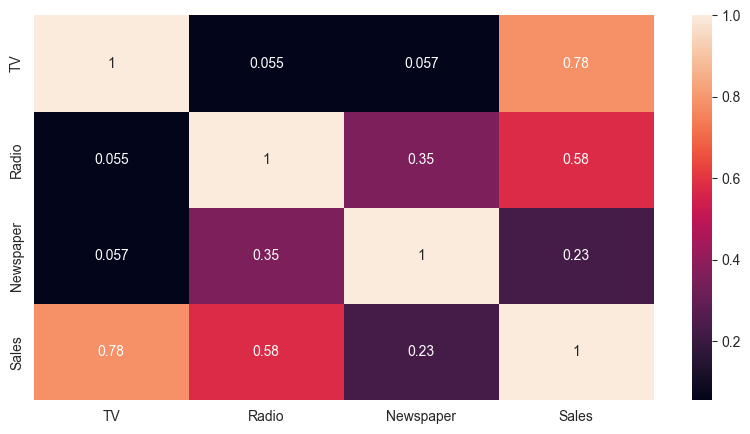

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True);

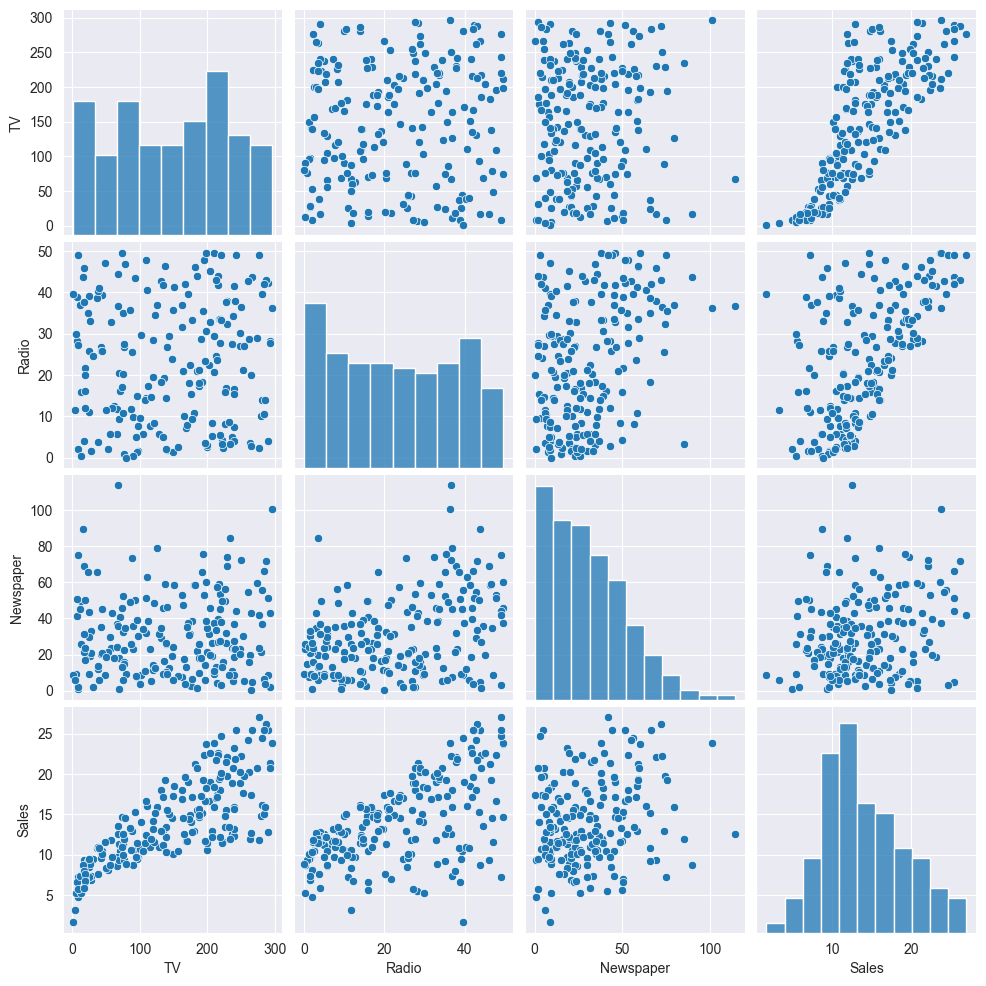

In [44]:
sns.pairplot(df);

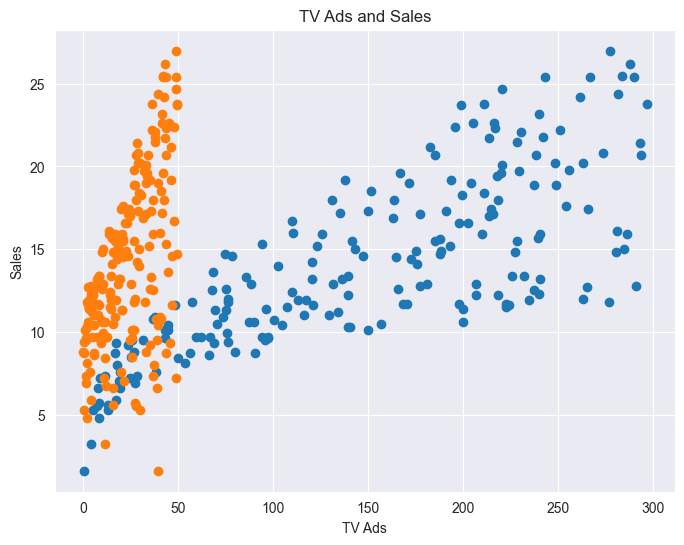

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'])
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.title('TV Ads and Sales')
plt.show()

In [46]:
abs(df.corr()['Sales']).sort_values(ascending=False).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

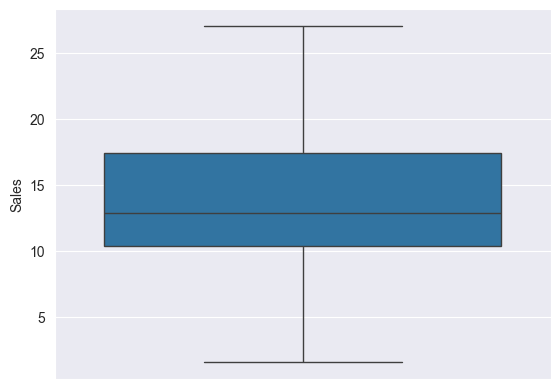

In [47]:
sns.boxplot(df['Sales']);

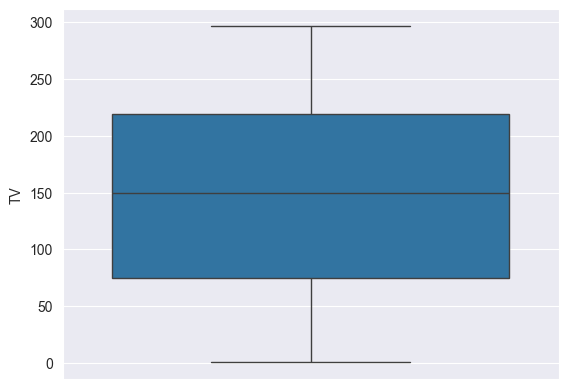

In [48]:
sns.boxplot(df['TV']);

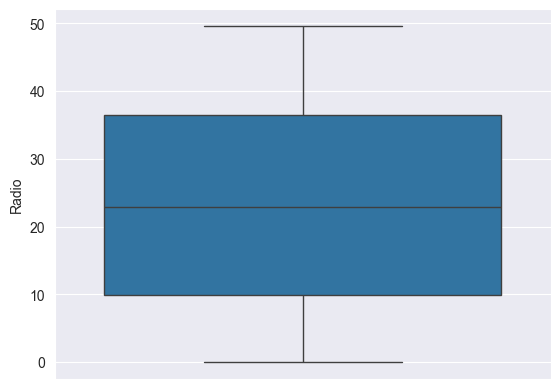

In [49]:
sns.boxplot(df['Radio']);

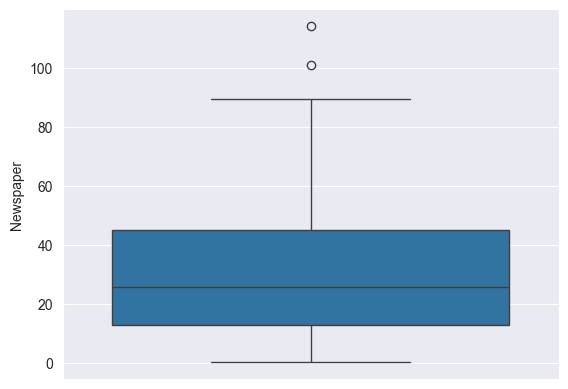

In [50]:
sns.boxplot(df['Newspaper']);

Outliers Detection

In [51]:
outliers = df.quantile(q = 0.99, numeric_only=True)

In [52]:
df = df[df['Newspaper'] < outliers['Newspaper']]

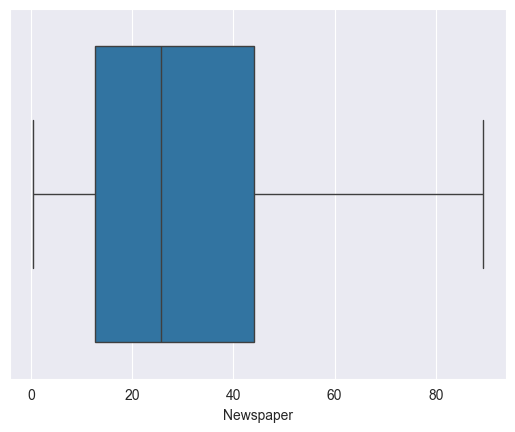

In [53]:
sns.boxplot(x='Newspaper', data=df);

### Feature Engineering

In [54]:
x = df.drop(['Sales'], axis=1)
y = df['Sales']

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

def algo_test(x,y):
    #Bütün modelleri tanımlıyorum
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    sgd=SGDRegressor()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    rkn=RadiusNeighborsRegressor(radius=1.0)
    ada=AdaBoostRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    svr=SVR()
    mlp_regressor = MLPRegressor()

    algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

    r_squared= []
    rmse= []
    mae= []

    #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**.5)
        mae.append(mean_absolute_error(y_test,p))

    #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable

In [56]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.840143e-01,6.584684e-01,5.293064e-01
XGBRegressor,9.831103e-01,6.768322e-01,5.883793e-01
KNeighborsRegressor,9.651176e-01,9.726868e-01,8.359088e-01
Decision Tree,9.647625e-01,9.776247e-01,7.825000e-01
Extra Tree,9.593243e-01,1.050357e+00,8.575000e-01
AdaBoost,9.260560e-01,1.416189e+00,9.015000e-01
mlp_regressor,9.104597e-01,1.558400e+00,1.098626e+00
Linear,8.989455e-01,1.655570e+00,1.249739e+00
Ridge,8.989428e-01,1.655592e+00,1.249763e+00
ElasticNet,8.985616e-01,1.658711e+00,1.253020e+00


In [57]:
import statsmodels.formula.api as smf

In [58]:
model = smf.gls('Sales ~ TV + Radio + Newspaper', data=df).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            GLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           8.35e-95
Time:                        00:19:12   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
Radio          0.1886      0.009     21.772      0.000       0.171       0.206
Newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [61]:
r2_score(y_test, y_pred)

0.8989454779619588

In [62]:
mean_squared_error(y_test, y_pred)**.5

np.float64(1.6555699642993031)

In [63]:
mean_absolute_error(y_test, y_pred)

np.float64(1.249739407523639)

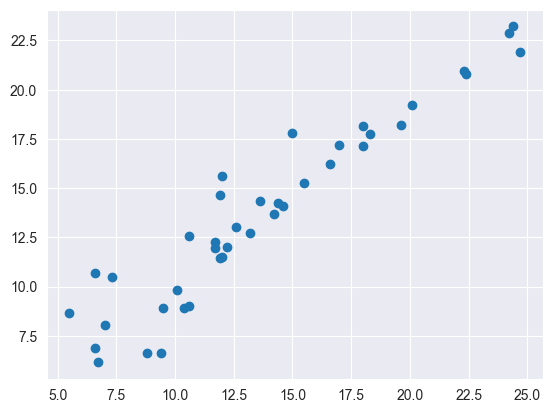

In [64]:
plt.scatter(y_test, y_pred)

### Feature Importance

In [65]:
feature_importance = pd.DataFrame({'feature': x_train.columns, 'Coefs': lr.coef_})
feature_importance = feature_importance.sort_values(by='Coefs', ascending=False)

feature_importance['Coefs'] = feature_importance['Coefs'] * 100

feature_importance

,feature,Coefs
1,Radio,18.239275
0,TV,4.522886
2,Newspaper,0.504291


In [66]:
sum_of_coefs = feature_importance['Coefs'].sum()
sum_of_coefs

np.float64(23.266451102059403)

In [67]:
100 / sum_of_coefs

np.float64(4.298034090431119)

In [68]:
feature_importance['investment rate'] = feature_importance['Coefs'] * 100 / sum_of_coefs
feature_importance

,feature,Coefs,investment rate
1,Radio,18.239275,78.393025
0,TV,4.522886,19.439516
2,Newspaper,0.504291,2.167459


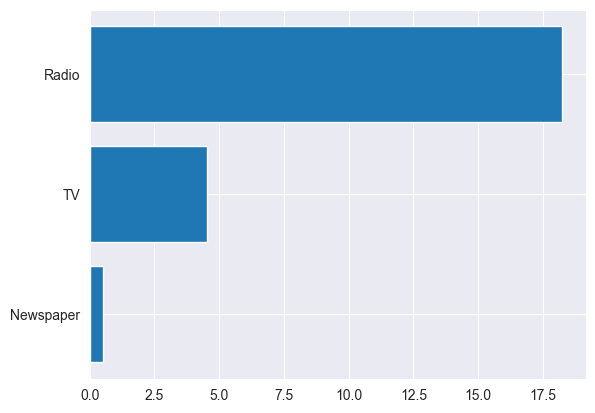

In [69]:
import matplotlib.pyplot as plt
plt.barh(feature_importance.feature, feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.show()

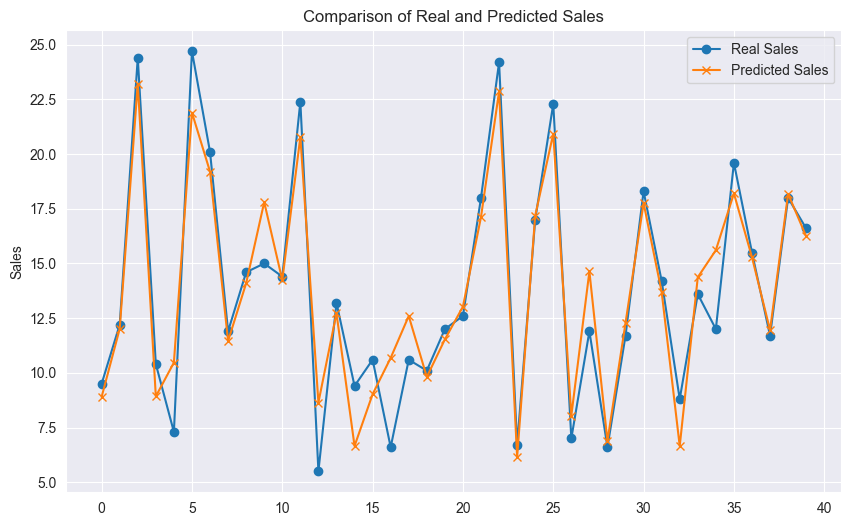

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.ylabel('Sales')
plt.title('Comparison of Real and Predicted Sales')
plt.legend()
plt.show()